# Introduction to Logistic Regression

### Implementation

In this notebook, we will implement logistic regression and demostrate its usage to classify images of handwritten digits. If you're interested in learning more about the theory, check out my blog post [here](https://abelmariam.github.io/2017/11/06/intro-to-logreg.html).

We have the data files $\texttt{train3.txt}$, $\texttt{test3.txt}$, $\texttt{train5.txt}$, and $\texttt{test5.txt}$ which contain 8x8 images of handwritten digits. Each image is represented in the files by one line of text. 

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def readData(filename):
    data = []
    
    with open(filename) as file:
        for line in file:
            data = data + [list(map(int, line.split()))]
          
    return data

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))
    
def logLikelihood(w,y,X):
    ll = 0.0
    
    for t in range(len(y)):
        ll = ll + (y[t]*np.log(sigmoid(np.inner(w,X[t])))) + \
             ((1-y[t])*np.log(sigmoid(-np.inner(w,X[t]))))
             
    return ll

# Note: We utilize one of the nice properties of the sigmoid function: s'(x) = s(x)*(1 - s(x))
def gradient(w,y,X):
    grad = np.zeros((len(w),))
    
    for t in range(len(y)):
        grad = np.add(grad,np.multiply(X[t],y[t]-sigmoid(np.inner(w,X[t]))))
        
    return grad
    

def gradAscent(start,stepSize,precision): 
    old = np.zeros((len(start),))
    new = start
    likelihood = [logLikelihood(start,y,X)]
    
    while abs(logLikelihood(old,y,X) - logLikelihood(new,y,X)) > precision:
        old = new
        new = old + (stepSize * gradient(old,y,X))
        likelihood = likelihood + [logLikelihood(new,y,X)]
    
    return new, likelihood

# Given the feature vector and corresponding set of coefficents, return the predicted label
# where 1 corresponds to a 3 digit and 0 being a 5 digit
def prediction(w,x):
    return int(sigmoid(np.inner(x,w)) > 0.5)

# Given the data set (X) with the corresponding label values (y) and the vector
# of coefficents (w), the function computes the error rate 
def errorRate(y,X,w):
    count = 0.0
    
    for i in range(len(X)):
        if prediction(w,X[i]) is not y[i]:
            count = count + 1.0
            
    return count/len(X)

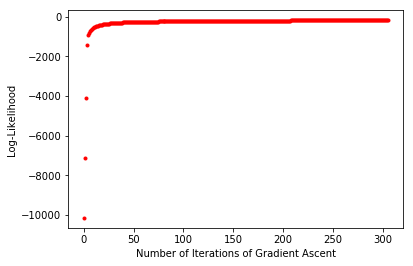

In [2]:
# Read in and format the training data

train3 = readData('./data/train3.txt') 
train5 = readData('./data/train5.txt')
X = train3 + train5   
y = [1]*len(train3) + [0]*len(train5) # Label of 1 corresponding to a three and 0 corresponding to a five digit

# Compute the maximum likelihood estimate of the weights computed via the gradient ascent algorithm
w, likelihood = gradAscent(np.random.rand(len(X[0])),0.02/len(X[0]),0.1)

# Calculate the training error rate (the ratio of training examples whose label was incorrectly predicted)
trainingError = errorRate(y,X,w)

# Plot of log-likelihood vs number of iterations of Gradient Ascent
fig, ax = plt.subplots() 
plt.plot(likelihood, 'r.')
plt.xlabel('Number of Iterations of Gradient Ascent')
plt.ylabel('Log-Likelihood')

Based on the graph above, we can see that the gradient ascent algorithm converged fairly quickly. We could try and tune the learning rate to improve performance but for the purposes of this notebook, its not necessary. Another thing worth noting is that since the log-likelihood is a concave function (in this case), we know that it in-fact converged to *the* global maximum. 

In [3]:
# Read in and format the test data

test3 = readData('./data/test3.txt')
test5 = readData('./data/test5.txt')
X = test3 + test5
y = [1]*len(test3) + [0]*len(test5)

# Calculate the test error rate (the ratio of test examples whose label was incorrectly predicted)
testError = errorRate(y,X,w)

print(f"Training error-rate: {trainingError:.3}")
print(f"Test error-rate: {testError:.3}")

Training error-rate: 0.0436
Test error-rate: 0.0612
